# **Trabalho de Conclusão de Curso**

**Ciência de dados aplicado a detecção de fraudes em transações de cartões de crédito**

Autor: Leonardo Farias Cruz
Arquivo: TCC - Leonardo Farias Cruz.ipynb

Script Python para o trabalho monográfico:  Aplicação de Ciência de Dados para classificação de fraudes em operações de cartão de crédito e débito
Pós-Graduação Lato Sensu em Ciência de Dados e Big Data PUC-MG
Ano 2022


In [1]:
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

# **Importação de pacotes**

In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import scikitplot as skplt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import matplotlib.pyplot as plt
from datetime import datetime
import joblib

#**Importação dos DataSet's**

#**Importação dos arquivos Utilizando o Google Colab**
Dataset original encontrado no Kaggle em https://www.kaggle.com/datasets/ealtman2019/credit-card-transactions



---
Repositório no Google Drive com os arquivos compartilhados: 
[Arquivos de dados CSV](https://drive.google.com/drive/folders/1jzNkAM2cyEUfa0eHEMYwswaVfqXh6_ES?usp=sharing)

Por conta do tamanho do arquivo de transações é recomendável fazer o download dos mesmos para uma pasta dentro de seu próprio Google Driver, conforme descrito:

('seudriver'\PUCMG\TCC)

'seudriver' - Pasta raiz em seu google driver

---

Após essa operação seguir com os passos subsequentes.

Arquivos: 

          sd254_users.csv (Cadastro de Usuários) 220Kb
          sd254_cards.csv (Cadastro de Cartões) 476Kb
          credit_card_transactions-ibm_v2 (Transações de cartões de crédito) 2.2Gb
          transacoes_new (Por questões de tamanho do ambiente limitou-se o arquivo de transações a 28.882 transações )
          arquivo_unificado (Arquivo unificado com transações_new, usuários e cartões) - Pode ser utilizado para ganhar tempo nos testes

Caso for utilizar o Google Colab sem ter uma pasta no google drive, utilizar esse passo para fazer upload dos arquivos

**Atenção, o arquivo de transações possui mais de 2GB de tamanho, por isso seu upload deve demorar.**

In [ ]:
# Caso seja da preferência do usuário, pode-se carregar os arquivos direto de seu computador
# Nesse caso vale salientar que o tamanho dos mesmos (mais de 2GB) pode tornar essa operação bastante demorada

#from google.colab import files
#uploaded = files.upload()




In [3]:
# PASSO 1
# Montagem do Drive de seu google drive (Obs. Os arquivos já devem ter sido copiados para uma pasta em seu drive antes)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Leitura dos DataSets**

Dataset de **Transações**

In [4]:
# PASSO 2  (Demora em torno de 1 minuto e meio)
# Leitura do arquivo de transações no google driver
# Obs. Somente após copiar os arquivos para o google driver e os mesmo estarem disponíveis (Driver atualizado)
# 
print('Início:',datetime.now())
transacoes = pd.read_csv('/content/drive/MyDrive/PUCMG/TCC/credit_card_transactions-ibm_v2.csv')
print('Fim...:',datetime.now())

Início: 2022-10-12 02:08:00.472309
Fim...: 2022-10-12 02:08:49.110531


DataSet de **Usuários**

In [5]:
# PASSO 3
# Leitura do arquivo de Usuarios no google driver
print('Início:',datetime.now())
usuarios = pd.read_csv('/content/drive/MyDrive/PUCMG/TCC/sd254_users.csv') 
print('Fim...:',datetime.now())


Início: 2022-10-12 02:09:48.020236
Fim...: 2022-10-12 02:09:48.043587


Dataset de **Cartões**

In [6]:
# PASSO 4
# Leitura do arquivo de Cartões o google driver
print('Início:',datetime.now())
cartoes = pd.read_csv('/content/drive/MyDrive/PUCMG/TCC/sd254_cards.csv') 
print('Fim...:',datetime.now())

Início: 2022-10-12 02:09:50.699936
Fim...: 2022-10-12 02:09:50.722556


# **Análise Exploratória dos dados**

**Visualização dos dados de cada Dataset**

In [7]:
print("\nCampos: {0}".format(transacoes.keys()))

# verificar o tamanho do DataFrame
print("Variáveis: ", transacoes.shape[1])
print("Entradas: ", transacoes.shape[0])
print("\nTipos dos dados:\n{0}\n".format(transacoes.dtypes))


Campos: Index(['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC',
       'Errors?', 'Is Fraud?'],
      dtype='object')
Variáveis:  15
Entradas:  24386900

Tipos dos dados:
User                int64
Card                int64
Year                int64
Month               int64
Day                 int64
Time               object
Amount             object
Use Chip           object
Merchant Name       int64
Merchant City      object
Merchant State     object
Zip               float64
MCC                 int64
Errors?            object
Is Fraud?          object
dtype: object



In [8]:
print("\nCampos: {0}".format(usuarios.keys()))

# verificar o tamanho do DataFrame
print("\n\nVariáveis: ", usuarios.shape[1])
print("Entradas: ", usuarios.shape[0])
print("\nTipos dos dados:\n{0}\n".format(usuarios.dtypes))


Campos: Index(['Person', 'Current Age', 'Retirement Age', 'Birth Year', 'Birth Month',
       'Gender', 'Address', 'Apartment', 'City', 'State', 'Zipcode',
       'Latitude', 'Longitude', 'Per Capita Income - Zipcode',
       'Yearly Income - Person', 'Total Debt', 'FICO Score',
       'Num Credit Cards'],
      dtype='object')


Variáveis:  18
Entradas:  2000

Tipos dos dados:
Person                          object
Current Age                      int64
Retirement Age                   int64
Birth Year                       int64
Birth Month                      int64
Gender                          object
Address                         object
Apartment                      float64
City                            object
State                           object
Zipcode                          int64
Latitude                       float64
Longitude                      float64
Per Capita Income - Zipcode     object
Yearly Income - Person          object
Total Debt                      o

In [9]:
print("\nCampos: {0}".format(cartoes.keys()))

# verificar o tamanho do DataFrame
print("\nVariáveis: ", cartoes.shape[1])
print("Entradas: ", cartoes.shape[0])
print("\nTipos dos dados:\n{0}\n".format(cartoes.dtypes))


Campos: Index(['User', 'CARD INDEX', 'Card Brand', 'Card Type', 'Card Number',
       'Expires', 'CVV', 'Has Chip', 'Cards Issued', 'Credit Limit',
       'Acct Open Date', 'Year PIN last Changed', 'Card on Dark Web'],
      dtype='object')

Variáveis:  13
Entradas:  6146

Tipos dos dados:
User                      int64
CARD INDEX                int64
Card Brand               object
Card Type                object
Card Number               int64
Expires                  object
CVV                       int64
Has Chip                 object
Cards Issued              int64
Credit Limit             object
Acct Open Date           object
Year PIN last Changed     int64
Card on Dark Web         object
dtype: object



In [10]:
transacoes.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [12]:
usuarios.head()

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1


In [13]:
cartoes.head()

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


**Verificação de colunas com valores nulos e exclusão de dados não significantes**



Dataframe "transacoes"

In [14]:
# ver os valores faltantes das colunas
(transacoes.isnull().sum()/ transacoes.shape[0]).sort_values(ascending=False)

Errors?           0.984072
Zip               0.118020
Merchant State    0.111569
User              0.000000
Card              0.000000
Year              0.000000
Month             0.000000
Day               0.000000
Time              0.000000
Amount            0.000000
Use Chip          0.000000
Merchant Name     0.000000
Merchant City     0.000000
MCC               0.000000
Is Fraud?         0.000000
dtype: float64

In [15]:
# exclusão de colunas com valores faltantes ou não significantes
# As classes 'Errors?', 'Zip' e 'Merchant State' foram retirados por apresentarem dados faltantes
# As classes 'Merchant State' e 'Mechant Name' foram excluídas por não apresentarem dados significantes
transacoes = transacoes.drop(columns=['Errors?','Zip','Merchant City','Merchant State','Merchant Name'])

(transacoes.isnull().sum()/ transacoes.shape[0]).sort_values(ascending=False)

User         0.0
Card         0.0
Year         0.0
Month        0.0
Day          0.0
Time         0.0
Amount       0.0
Use Chip     0.0
MCC          0.0
Is Fraud?    0.0
dtype: float64

Dataframe "usuarios"

In [16]:
# ver os valores faltantes das colunas
(usuarios.isnull().sum()/ usuarios.shape[0]).sort_values(ascending=False)

Apartment                      0.736
Person                         0.000
Zipcode                        0.000
FICO Score                     0.000
Total Debt                     0.000
Yearly Income - Person         0.000
Per Capita Income - Zipcode    0.000
Longitude                      0.000
Latitude                       0.000
State                          0.000
Current Age                    0.000
City                           0.000
Address                        0.000
Gender                         0.000
Birth Month                    0.000
Birth Year                     0.000
Retirement Age                 0.000
Num Credit Cards               0.000
dtype: float64

In [17]:
# exclusão de colunas com valores faltantes ou não significativos para a determinação da fraude
# O campo 'Apartament' foi excluído já que o mesmo apresenta dados faltantes e não é relevante para a busca por fraudes
# Os campos 'Retirement Age', 'Birth Year' e 'Birth Month' foram excluídos já que a informação da data de nascimento já consta no campo 'Current Age'
# Os campos 'Address', 'Zipcode', 'Latitude', 'Longitude', 'Per Capita Income - Zipcode' foram retirados pois não são relevantes para a busca por fraudes
usuarios = usuarios.drop(columns=['Person','Retirement Age','Birth Year','Address','Apartment','Zipcode','Latitude','Longitude','Per Capita Income - Zipcode'])

(usuarios.isnull().sum()/ usuarios.shape[0]).sort_values(ascending=False)

Current Age               0.0
Birth Month               0.0
Gender                    0.0
City                      0.0
State                     0.0
Yearly Income - Person    0.0
Total Debt                0.0
FICO Score                0.0
Num Credit Cards          0.0
dtype: float64

Dataframe "cartoes"

In [18]:
# ver os valores faltantes das colunas
(cartoes.isnull().sum()/ cartoes.shape[0]).sort_values(ascending=False)

User                     0.0
CARD INDEX               0.0
Card Brand               0.0
Card Type                0.0
Card Number              0.0
Expires                  0.0
CVV                      0.0
Has Chip                 0.0
Cards Issued             0.0
Credit Limit             0.0
Acct Open Date           0.0
Year PIN last Changed    0.0
Card on Dark Web         0.0
dtype: float64

In [19]:
# exclusão de colunas com valores faltantes ou não significantes
# O campo 'Cards Issued' foi excluído por não ser relevante na busca por fraudes
cartoes = cartoes.drop(columns=['Cards Issued'])

(usuarios.isnull().sum()/ usuarios.shape[0]).sort_values(ascending=False)

Current Age               0.0
Birth Month               0.0
Gender                    0.0
City                      0.0
State                     0.0
Yearly Income - Person    0.0
Total Debt                0.0
FICO Score                0.0
Num Credit Cards          0.0
dtype: float64

# **Mineração de dados (Data Mining)**

DataSet de Transações com limite de 28.882 linhas (Por conta do tamanho do arquivo e a exigência de memória RAM no Colab o mesmo foi limitado as transações de 2 usuários, ou seja,  28.882 transações)

In [20]:
# Cópia para novo dataframe
transacoes_new = transacoes.copy();

In [21]:
# Limitação do número de transações para não ultrapassar a memória RAM da ferramenta Colab durante o trabalho
transacoes_new.query('User == 0 or User == 1', inplace=True)

# **Criação de Dateframe Único**

Ao se analisar os dados do dataset "usuarios" notou-se que os mesmos não são relevantes para a determinação de fraudes, já que os mesmos dados não variam para todas as transações, sejam elas fraudes ou não. Isso se dá pela modelagem relacional feita nos dataset's originais. 
Desta forma, optou-se por não incluir as informações do dataset "usuario" no arquivo único final.

Junção dos Dataframes "transacao", "usuarios" e "cartoes"

In [22]:
# Cópia do dataset "cartoes" para novo dataset de trabalho. 
new_cartoes = cartoes.copy(deep=True);

# Alteração do nome da coluna "CARD INDEX" para simplificação no algortimo posterior de busca
new_cartoes = new_cartoes.rename(columns={"CARD INDEX":"Card"})

# Criação de chave de índice no dataset "new_cartoes" para busca dos dados dos cartões
new_cartoes.set_index(['User','Card'], inplace=True)

In [23]:
# Algoritmo criado para buscar informações dos cartões para cada transação no dataset "transacoes_new"
print('Início:',datetime.now())
data_frame_juncao = pd.DataFrame()
# Iterando sobre transacoes_new  (Essa iteração demora cerca de 4 minutos e trinta segundos)
for i in transacoes_new.itertuples():
  colunas = pd.DataFrame({
  'bandeira' : [new_cartoes.loc[(i.User,i.Card),'Card Brand']],
  'tipo' : [new_cartoes.loc[(i.User,i.Card),'Card Type']],
  'tem_chip' : [new_cartoes.loc[(i.User,i.Card),'Has Chip']],
  'limite_credito' : [new_cartoes.loc[(i.User,i.Card),'Credit Limit']],
  'ano_ultima_mudanca_pin' : [new_cartoes.loc[(i.User,i.Card),'Year PIN last Changed']],
  'dark_web' : [new_cartoes.loc[(i.User,i.Card),'Card on Dark Web']]
  })
  data_frame_juncao = pd.concat([colunas,data_frame_juncao]).reset_index(drop=True)

print('Fim...:',datetime.now())

Início: 2022-10-12 02:12:16.358759
Fim...: 2022-10-12 02:14:58.115774


In [24]:
# Criação do arquivo unificado de transações e dados de cartões
arquivo_unificado = transacoes_new.copy() 
arquivo_unificado['bandeira'] = data_frame_juncao['bandeira']
arquivo_unificado['tipo'] = data_frame_juncao['tipo']
arquivo_unificado['tem_chip'] = data_frame_juncao['tem_chip']
arquivo_unificado['limite_credito'] = data_frame_juncao['limite_credito']
arquivo_unificado['ano_ultima_mudanca_pin'] = data_frame_juncao['ano_ultima_mudanca_pin']
arquivo_unificado['dark_web'] = data_frame_juncao['dark_web']


In [25]:
# Verificando existência de valores vazios
(arquivo_unificado.isnull().sum()/ arquivo_unificado.shape[0]).sort_values(ascending=False)

User                      0.0
Card                      0.0
Year                      0.0
Month                     0.0
Day                       0.0
Time                      0.0
Amount                    0.0
Use Chip                  0.0
MCC                       0.0
Is Fraud?                 0.0
bandeira                  0.0
tipo                      0.0
tem_chip                  0.0
limite_credito            0.0
ano_ultima_mudanca_pin    0.0
dark_web                  0.0
dtype: float64

In [26]:
# Movendo coluna Fraude para o final
arquivo_unificado_antigo = arquivo_unificado.copy()
cols = arquivo_unificado.shape[1]
print(cols)

coluna_fraude = arquivo_unificado.pop('Is Fraud?')

arquivo_unificado.insert(15,'Fraud',coluna_fraude)

16


In [27]:
# Persistência do arquivo unificado no drive do presente usuário
arquivo_unificado.to_csv('/content/drive/MyDrive/PUCMG/TCC/arquivo_unificado.csv')

In [28]:
(arquivo_unificado.isnull().sum()/ arquivo_unificado.shape[0]).sort_values(ascending=False)

User                      0.0
Card                      0.0
Year                      0.0
Month                     0.0
Day                       0.0
Time                      0.0
Amount                    0.0
Use Chip                  0.0
MCC                       0.0
bandeira                  0.0
tipo                      0.0
tem_chip                  0.0
limite_credito            0.0
ano_ultima_mudanca_pin    0.0
dark_web                  0.0
Fraud                     0.0
dtype: float64

# **Feature Engineering - Alteração dos tipos das colunas**


**Variáveis Objeto**

1. Transformação da coluna "Fraud" para formato binário (1 ou 0) 

In [29]:
# Altera-se o tipo utilizando uma nova série
# Exclui-se a classe antiga "Fraud"
# Insere a nova classe "Fraude"
arquivo_fraude = pd.Series(np.where(arquivo_unificado['Fraud']=='Yes',1,0))
arquivo_unificado.insert(15,'Fraude',arquivo_fraude) 
arquivo_unificado.pop('Fraud')
arquivo_unificado_antigo.insert(15,'Fraud',arquivo_fraude)

In [30]:
(arquivo_unificado.isnull().sum()/ arquivo_unificado.shape[0]).sort_values(ascending=False)

User                      0.0
Card                      0.0
Year                      0.0
Month                     0.0
Day                       0.0
Time                      0.0
Amount                    0.0
Use Chip                  0.0
MCC                       0.0
bandeira                  0.0
tipo                      0.0
tem_chip                  0.0
limite_credito            0.0
ano_ultima_mudanca_pin    0.0
dark_web                  0.0
Fraude                    0.0
dtype: float64

In [31]:
# Verificação da série criada
arquivo_fraude.value_counts()

0    28822
1       60
dtype: int64

2. Transformação da coluna "tem_chip" para o formato binário (1 ou 0)

In [32]:
chip = pd.Series(np.where(arquivo_unificado['tem_chip']=='YES',1,0))
arquivo_unificado.pop('tem_chip')
arquivo_unificado.insert(10,'tem_chip',chip)

3. Transformação da coluna "dark_web" para formato binário (1 ou 0)

In [33]:
dark_web = pd.Series(np.where(arquivo_unificado['dark_web']=='No',0,1))
arquivo_unificado.pop('dark_web')
arquivo_unificado.insert(10,'dark_web',dark_web)

 4.   Alteração do tipo de dados da coluna "Amount" de Object para Float64.

In [34]:
arquivo_unificado['Amount'] = arquivo_unificado['Amount'].str.replace('$','').astype(np.float64)
arquivo_unificado_antigo['Amount'] = arquivo_unificado_antigo['Amount'].str.replace('$','').astype(np.float64)
print("\nTipos dos dados:\n{0}\n".format(arquivo_unificado.dtypes))


Tipos dos dados:
User                        int64
Card                        int64
Year                        int64
Month                       int64
Day                         int64
Time                       object
Amount                    float64
Use Chip                   object
MCC                         int64
bandeira                   object
dark_web                    int64
tem_chip                    int64
tipo                       object
limite_credito             object
ano_ultima_mudanca_pin      int64
Fraude                      int64
dtype: object



5. Alteração do tipo de dados da coluna "limite_credito" de Object para Float64

In [35]:
arquivo_unificado['limite_credito'] = arquivo_unificado['limite_credito'].str.replace('$','').astype(np.float64)
print("\nTipos dos dados:\n{0}\n".format(arquivo_unificado.dtypes))


Tipos dos dados:
User                        int64
Card                        int64
Year                        int64
Month                       int64
Day                         int64
Time                       object
Amount                    float64
Use Chip                   object
MCC                         int64
bandeira                   object
dark_web                    int64
tem_chip                    int64
tipo                       object
limite_credito            float64
ano_ultima_mudanca_pin      int64
Fraude                      int64
dtype: object



**Verificando tipo de variáveis**

Variáveis categóricas

In [36]:
arquivo_unificado.select_dtypes(include='object')

,Time,Use Chip,bandeira,tipo
0,06:21,Swipe Transaction,Mastercard,Debit (Prepaid)
1,06:42,Swipe Transaction,Mastercard,Debit (Prepaid)
2,06:22,Swipe Transaction,Mastercard,Debit (Prepaid)
3,17:45,Swipe Transaction,Mastercard,Debit (Prepaid)
4,06:23,Swipe Transaction,Mastercard,Debit (Prepaid)
...,...,...,...,...
28877,06:52,Chip Transaction,Visa,Debit
28878,13:03,Online Transaction,Visa,Debit
28879,06:56,Chip Transaction,Visa,Debit
28880,13:03,Chip Transaction,Visa,Debit


Transformando variáveis categóricas em Array de variáveis binárias

In [37]:
# Utiliando OneHotEncoder para transformar as variáveis categóricas
#     O parâmetro Handle_unknown = ignore, especifica a maneira que categorias desconhecidas serão implementadas. 
#     Neste caso esse tipo de coluna receberá valores "0" (zero)
encode = OneHotEncoder(handle_unknown='ignore')
colunas_encodar = ['Use Chip','bandeira','tipo']
encode.fit(arquivo_unificado[colunas_encodar])
encode.get_feature_names(colunas_encodar)

array(['Use Chip_Chip Transaction', 'Use Chip_Online Transaction',
       'Use Chip_Swipe Transaction', 'bandeira_Mastercard',
       'bandeira_Visa', 'tipo_Credit', 'tipo_Debit',
       'tipo_Debit (Prepaid)'], dtype=object)

In [38]:
# Aplica o Encode criando as colunas com o tipo Int
arquivo_unificado_encodado = pd.DataFrame(encode.transform(arquivo_unificado[colunas_encodar]).toarray()).astype('int')
arquivo_unificado_encodado.columns = encode.get_feature_names(colunas_encodar)

In [39]:
arquivo_unificado_encodado.sample(10)

,Use Chip_Chip Transaction,Use Chip_Online Transaction,Use Chip_Swipe Transaction,bandeira_Mastercard,bandeira_Visa,tipo_Credit,tipo_Debit,tipo_Debit (Prepaid)
10078,1,0,0,0,1,1,0,0
10511,1,0,0,0,1,1,0,0
20454,0,0,1,0,1,0,1,0
11193,0,0,1,0,1,1,0,0
13450,0,0,1,0,1,1,0,0
8011,0,0,1,0,1,0,1,0
4619,1,0,0,1,0,0,1,0
878,0,0,1,1,0,0,0,1
18090,0,0,1,0,1,1,0,0
1268,0,0,1,1,0,0,0,1


In [40]:
print("\nTipos dos dados:\n{0}\n".format(arquivo_unificado.dtypes))


Tipos dos dados:
User                        int64
Card                        int64
Year                        int64
Month                       int64
Day                         int64
Time                       object
Amount                    float64
Use Chip                   object
MCC                         int64
bandeira                   object
dark_web                    int64
tem_chip                    int64
tipo                       object
limite_credito            float64
ano_ultima_mudanca_pin      int64
Fraude                      int64
dtype: object



Variáveis numéricas

No caso das variáveis numéricas não será necessário transformações, nesse momento. 

In [41]:
arquivo_unificado.select_dtypes(exclude='object')

,User,Card,Year,Month,Day,Amount,MCC,dark_web,tem_chip,limite_credito,ano_ultima_mudanca_pin,Fraude
0,0,0,2002,9,1,134.09,5300,0,1,99.0,2012,0
1,0,0,2002,9,1,38.48,5411,0,1,99.0,2012,0
2,0,0,2002,9,2,120.34,5411,0,1,99.0,2012,0
3,0,0,2002,9,2,128.95,5651,0,1,99.0,2012,0
4,0,0,2002,9,3,104.71,5912,0,1,99.0,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...
28877,1,4,2020,2,1,15.77,5541,0,1,24295.0,2008,0
28878,1,4,2020,2,3,51.55,4814,0,1,24295.0,2008,0
28879,1,4,2020,2,6,17.74,5499,0,1,24295.0,2008,0
28880,1,4,2020,2,11,15.10,5814,0,1,24295.0,2008,0


In [42]:
arquivo_unificado_numerico = arquivo_unificado.select_dtypes(exclude='object')

In [43]:
arquivo_unificado_numerico.head()

,User,Card,Year,Month,Day,Amount,MCC,dark_web,tem_chip,limite_credito,ano_ultima_mudanca_pin,Fraude
0,0,0,2002,9,1,134.09,5300,0,1,99.0,2012,0
1,0,0,2002,9,1,38.48,5411,0,1,99.0,2012,0
2,0,0,2002,9,2,120.34,5411,0,1,99.0,2012,0
3,0,0,2002,9,2,128.95,5651,0,1,99.0,2012,0
4,0,0,2002,9,3,104.71,5912,0,1,99.0,2012,0


**Arquivo Final**

O arquivo final será formado da concatenação do dataframe unificado após o processo de encode mais o dataframe de dados numéricos.

In [44]:
# Criação do dataframe unificado "X"
X = arquivo_unificado_encodado
X = pd.concat([X,arquivo_unificado_numerico],axis=1)
# Criação do dataframe alvo "y"
y = arquivo_fraude.copy()

In [45]:
X.head()

,Use Chip_Chip Transaction,Use Chip_Online Transaction,Use Chip_Swipe Transaction,bandeira_Mastercard,bandeira_Visa,tipo_Credit,tipo_Debit,tipo_Debit (Prepaid),User,Card,Year,Month,Day,Amount,MCC,dark_web,tem_chip,limite_credito,ano_ultima_mudanca_pin,Fraude
0,0,0,1,1,0,0,0,1,0,0,2002,9,1,134.09,5300,0,1,99.0,2012,0
1,0,0,1,1,0,0,0,1,0,0,2002,9,1,38.48,5411,0,1,99.0,2012,0
2,0,0,1,1,0,0,0,1,0,0,2002,9,2,120.34,5411,0,1,99.0,2012,0
3,0,0,1,1,0,0,0,1,0,0,2002,9,2,128.95,5651,0,1,99.0,2012,0
4,0,0,1,1,0,0,0,1,0,0,2002,9,3,104.71,5912,0,1,99.0,2012,0


In [46]:
# Visualização do formato do dataframe "X"
X.shape

(28882, 20)

In [47]:
# Visualização do formato do dataframe "y"
y.shape

(28882,)

# **Verificação de Balanceamento da coluna Fraude**

In [48]:
print(y.value_counts())
print("\nFraudes representam {:.4f}% do dataset.\n".format((y[y==1].shape[0]/y.shape[0])*100))

0    28822
1       60
dtype: int64

Fraudes representam 0.2077% do dataset.



[]

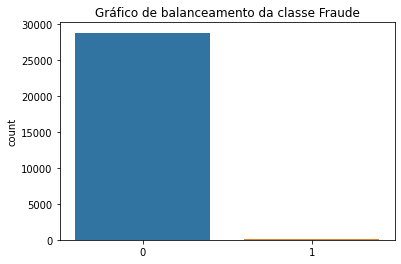

In [49]:
# Platagem do gráfico de balanceamento
fig, ax = plt.subplots()
sns.countplot(y, data = y[y==1], ax = ax)
ax.set_title('Gráfico de balanceamento da classe Fraude')
plt.plot()


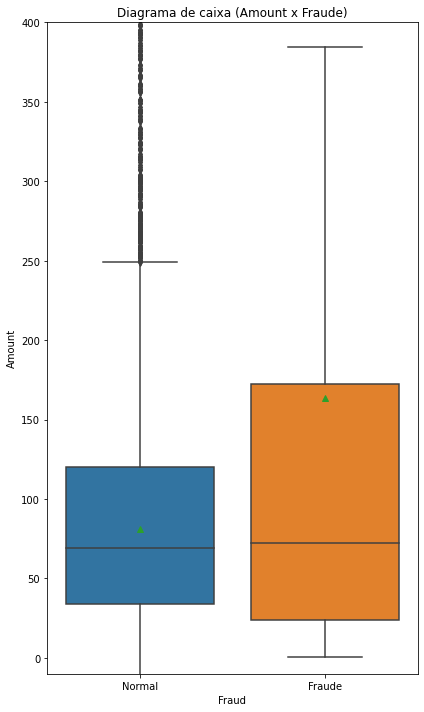

In [50]:
# Plotando o diagram de caixa para verificar se há diferenças claras entre os valores das 
# transações fraudulentas das transações normais.

fig, ax = plt.subplots(figsize=(6,10), sharex=True)
ax.set_title('Diagrama de caixa (Amount x Fraude)')

sns.boxplot(arquivo_unificado_antigo.Fraud, arquivo_unificado_antigo.Amount, showmeans =True, ax=ax)
plt.ylim(-10,400)
plt.xticks([0,1],['Normal','Fraude'])

plt.tight_layout()

# **Reescalando dados**
Reescalar as features, que estão em ordem de grandeza diferenes. Padronização das features para torná-las manejáveis aos modelos.

In [349]:
# Criando dataframe de "X_escalado"
X_escalado = X.copy()

# Escalando cada feature que possuem padrões de grandeza diferentes (Nesse caso maiores).
scaler = StandardScaler()
X_escalado['esc_Year'] = scaler.fit_transform(X_escalado['Year'].values.reshape(-1,1))
X_escalado['esc_Amount'] = scaler.fit_transform(X_escalado['Amount'].values.reshape(-1,1))
X_escalado['esc_MCC'] = scaler.fit_transform(X_escalado['MCC'].values.reshape(-1,1))
X_escalado['esc_limite_credito'] = scaler.fit_transform(X_escalado['limite_credito'].values.reshape(-1,1))
X_escalado['esc_ano_ultima_mudanca_pin'] = scaler.fit_transform(X_escalado['ano_ultima_mudanca_pin'].values.reshape(-1,1))

# Excluindo features antigas, dessa forma apenas features escaladas permanecem no dataframe
X_escalado.drop(['Year','Amount','MCC','limite_credito','ano_ultima_mudanca_pin'], axis=1, inplace=True)


In [350]:
X_escalado.head()

,Use Chip_Chip Transaction,Use Chip_Online Transaction,Use Chip_Swipe Transaction,bandeira_Mastercard,bandeira_Visa,tipo_Credit,tipo_Debit,tipo_Debit (Prepaid),User,Card,Month,Day,dark_web,tem_chip,Fraude,esc_Year,esc_Amount,esc_MCC,esc_limite_credito,esc_ano_ultima_mudanca_pin
0,0,0,1,1,0,0,0,1,0,0,9,1,0,1,0,-1.85415,0.451201,-0.404647,-1.432296,0.351837
1,0,0,1,1,0,0,0,1,0,0,9,1,0,1,0,-1.85415,-0.365118,-0.275734,-1.432296,0.351837
2,0,0,1,1,0,0,0,1,0,0,9,2,0,1,0,-1.85415,0.333804,-0.275734,-1.432296,0.351837
3,0,0,1,1,0,0,0,1,0,0,9,2,0,1,0,-1.85415,0.407316,0.002997,-1.432296,0.351837
4,0,0,1,1,0,0,0,1,0,0,9,3,0,1,0,-1.85415,0.200355,0.306117,-1.432296,0.351837


# **Verificação da Matrix de Correlação**
Indica o coeficiente de conexão entre as diversas features. 

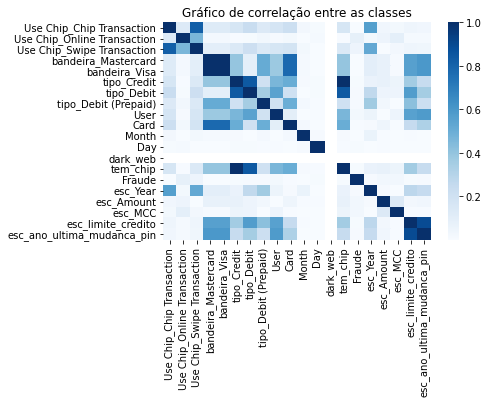

In [351]:
correlacao_matriz = X_escalado.corr().abs()
sns.heatmap(correlacao_matriz, cmap="Blues")

# Plotando gráfico de correlação
plt.title('Gráfico de correlação entre as classes')
plt.show()

In [352]:
# Determina quais classes serão excluídas com base no fator de correlação.
acima = correlacao_matriz.where(np.triu(np.ones(correlacao_matriz.shape),k=1).astype(np.bool_))
# Parâmetro de corte '0.70' escolhido após testes. Foram testados valores ( <= 0.5 ;  0.6 ; 0.7 ; 0.75 ; >= 0,8)
#         O ponto de estabilidade nos resultados foi encontrado em 0.7
para_excluir = [column for column in acima.columns if any(acima[column] >= 0.70)]

In [353]:
para_excluir

['Use Chip_Swipe Transaction',
 'bandeira_Visa',
 'tipo_Debit',
 'Card',
 'tem_chip',
 'esc_ano_ultima_mudanca_pin']

In [354]:
X_escalado.drop(para_excluir, axis=1).columns.tolist()

['Use Chip_Chip Transaction',
 'Use Chip_Online Transaction',
 'bandeira_Mastercard',
 'tipo_Credit',
 'tipo_Debit (Prepaid)',
 'User',
 'Month',
 'Day',
 'dark_web',
 'Fraude',
 'esc_Year',
 'esc_Amount',
 'esc_MCC',
 'esc_limite_credito']

In [355]:
# Exclui do dataframe "X_final" as classes indicadas pela matriz de correlação
X_final = X_escalado.drop(['Use Chip_Swipe Transaction','bandeira_Visa','tipo_Debit',
                           'Card','tem_chip','esc_ano_ultima_mudanca_pin'],axis=1).copy()

# **Conclusões sobre a análise dos dados**

*   O dataset final está desbalanceado, e deverá passar pelo processo de balanceamento após divisão para treino e teste
*   Não existem valores ausentes no Dataset final
*   Algumas colunas foram excluídas de acordo com a indicação na matriz de correlação, desta forma aumentando o desempenho do modelo através da diminuição da complexidade computacional.



**Gravando arquivos criado no Google Drive**

In [188]:
X.to_csv('/content/drive/MyDrive/PUCMG/TCC/X.csv')
y.to_csv('/content/drive/MyDrive/PUCMG/TCC/y.csv')

X_escalado.to_csv('/content/drive/MyDrive/PUCMG/TCC/X_escalado.csv')
X_final.to_csv('/content/drive/MyDrive/PUCMG/TCC/X_final.csv')


# **Preparando dados para uso nos modelos**


Divisão dos dataset's finais entre Treino e Teste

In [492]:
# Excluindo a classe "Fraude" do dataframe "X_entrada"
X_entrada = X_final.drop('Fraude',axis=1)

# Split dos dados em dataframe's de Treino e Teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_entrada, y)

In [ ]:
X_teste

Balanceamento dos dados
*   Será usada a técnica de under-sampling



In [493]:
# Balanceamento UnderSampler
bal_randomico = RandomUnderSampler()
X_bal, y_bal = bal_randomico.fit_resample(X_treino, y_treino)

In [494]:
# Verificar o balanceamento após UnderSampler
print(pd.Series(y_bal).value_counts())

0    47
1    47
dtype: int64


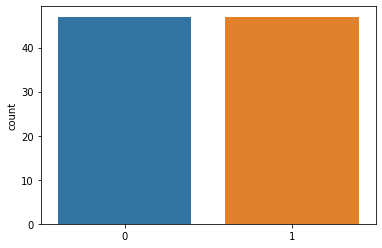

In [495]:
sns.countplot(y_bal)

In [496]:
# Balanceamento OverSamples
bal_oversampler = RandomOverSampler()
X_bal_over, y_bal_over = bal_oversampler.fit_resample(X_treino, y_treino)

In [497]:
# Verificar o balanceamento após OverSampler
print(pd.Series(y_bal_over).value_counts())

0    21614
1    21614
dtype: int64


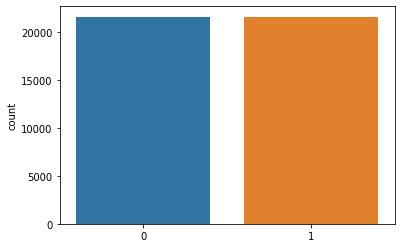

In [498]:
sns.countplot(y_bal_over)

# **Modelo de Regressão Logística**

Utilizando Dataframe's balanceados com UnderSampler

In [507]:
# Criando objeto do modelo

# Parâmetro "max_iter" ajustado após testes. Foram usados valore (5, 10, 100, 1000). 
#        Abaixo de 100 o algoritmo não consegue convergência.
#        O ponto de estabilização dos resultados fica próximo de 1000.
modelo_rl = LogisticRegression(max_iter=1000)

# Treinamento do modelo
modelo_rl.fit(X_bal, y_bal)

#Previsões nos dados de Teste

y_pred = modelo_rl.predict(X_teste)
y_prova = modelo_rl.predict_proba(X_teste)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9994    0.8595    0.9241      7208
           1     0.0088    0.6923    0.0174        13

    accuracy                         0.8592      7221
   macro avg     0.5041    0.7759    0.4708      7221
weighted avg     0.9976    0.8592    0.9225      7221

Acurácia: 0.8592

AUC: 0.7759



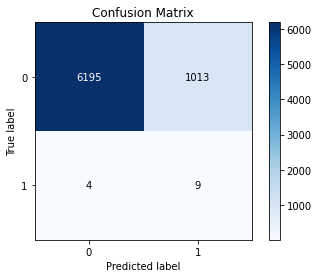

In [508]:
#Avaliação do modelo

#Matriz de confusão
skplt.metrics.plot_confusion_matrix(y_teste, y_pred)

#Classificação
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred, digits=4))

# Acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_teste, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_teste, y_pred)))

Utilizando Dataframe's balanceados com OverSampler

In [509]:
# Criando objeto do modelo

# Parâmetro "max_iter" ajustado após testes. Foram usados valore (5, 10, 100, 1000). 
#        Abaixo de 100 o algoritmo não consegue convergência.
#        O ponto de estabilização dos resultados fica próximo de 1000.
modelo_rl = LogisticRegression(max_iter=1000)

# Treinamento do modelo
modelo_rl.fit(X_bal_over, y_bal_over)

#Previsões nos dados de Teste

y_pred = modelo_rl.predict(X_teste)
y_prova = modelo_rl.predict_proba(X_teste)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9995    0.8629    0.9262      7208
           1     0.0100    0.7692    0.0198        13

    accuracy                         0.8628      7221
   macro avg     0.5048    0.8161    0.4730      7221
weighted avg     0.9977    0.8628    0.9246      7221

Acurácia: 0.8628

AUC: 0.8161



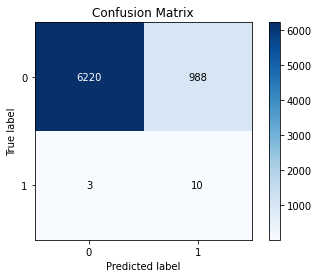

In [510]:
#Avaliação do modelo

#Matriz de confusão
skplt.metrics.plot_confusion_matrix(y_teste, y_pred)

#Classificação
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred, digits=4))

# Acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_teste, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_teste, y_pred)))

# **Modelo GradientBoosting**

Utilizando dataframe's com balanceados UnderSampler para treino do modelo

In [503]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Parâmetro "max_depth" ajustado após testes. Foram usados valore (5, 10, 100, 1000). 
#        O ponto de estabilização dos resultados fica próximo de 100
model = GradientBoostingClassifier(max_depth=100)
model.fit(X_bal, y_bal)

y_pred = model.predict(X_teste)
y_prova = model.predict_proba(X_teste)

print('Acurácia %0f' % model.score(X_teste, y_teste))

Acurácia 0.796150


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.7959    0.8863      7208
           1     0.0081    0.9231    0.0160        13

    accuracy                         0.7962      7221
   macro avg     0.5040    0.8595    0.4512      7221
weighted avg     0.9980    0.7962    0.8847      7221

Acurácia: 0.7962

AUC: 0.8595



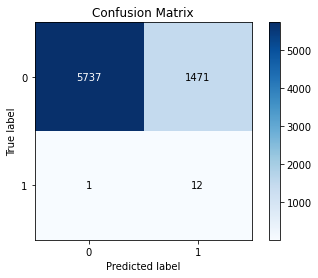

In [504]:
#Avaliação do modelo

#Matriz de confusão
skplt.metrics.plot_confusion_matrix(y_teste, y_pred)

#Classificação
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred, digits=4))

# Acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_teste, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_teste, y_pred)))

Utilizando dataframe's com balanceamento OverSampler dos para treino do modelo

In [505]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Parâmetro "max_depth" ajustado após testes. Foram usados valore (5, 10, 100, 1000). 
#        O ponto de estabilização dos resultados fica próximo de 100
model = GradientBoostingClassifier(max_depth=100)
model.fit(X_bal_over, y_bal_over)

y_pred = model.predict(X_teste)
y_prova = model.predict_proba(X_teste)

print('Acurácia %0f' % model.score(X_teste, y_teste))

Acurácia 0.998615


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9993    0.9993    0.9993      7208
           1     0.6154    0.6154    0.6154        13

    accuracy                         0.9986      7221
   macro avg     0.8073    0.8073    0.8073      7221
weighted avg     0.9986    0.9986    0.9986      7221

Acurácia: 0.9986

AUC: 0.8073



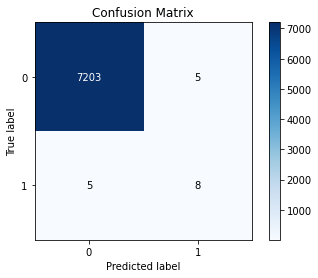

In [506]:
#Avaliação do modelo

#Matriz de confusão
skplt.metrics.plot_confusion_matrix(y_teste, y_pred)

#Classificação
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred, digits=4))

# Acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_teste, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_teste, y_pred)))